In [1]:
import quandl

In [2]:
quandl.ApiConfig.api_key = "znGR4tW3YiZBhmxBbnr1"

In [4]:
help(quandl)

Help on package quandl:

NAME
    quandl - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    api_config
    bulkdownload
    connection
    errors (package)
    export_table
    get
    get_point_in_time
    get_table
    message
    model (package)
    operations (package)
    util
    utils (package)
    version

FILE
    /usr/local/anaconda3/envs/venv/lib/python3.9/site-packages/quandl/__init__.py




In [21]:
help(quandl.bulkdownload)

Help on function bulkdownload in module quandl.bulkdownload:

bulkdownload(database, **kwargs)
    Downloads an entire database.
    :param str database: The database code to download
    :param str filename: The filename for the download.     If not specified, will download to the current working directory
    :param str api_key: Most databases require api_key for bulk download
    :param str download_type: 'partial' or 'complete'.     See: https://www.quandl.com/docs/api#database-metadata



In [3]:
estc_df = quandl.get("XNAS/ESTC", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1")

ForbiddenError: (Status 403) (Quandl Error QEPx04) You do not have permission to view this dataset. Please subscribe to this database to get access.

In [12]:
estc_df = quandl.get("FRED/GDP", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1")

In [13]:
estc_df.head()

,Value
Date,
2020-01-01,21481.367
2020-04-01,19477.444
2020-07-01,21138.574
2020-10-01,21477.597
2021-01-01,22038.226


<AxesSubplot:xlabel='Date'>

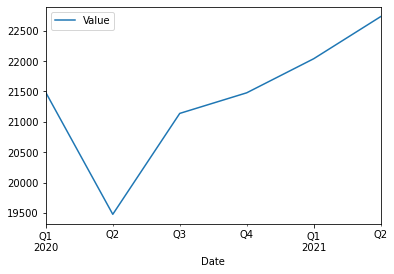

In [14]:
estc_df.plot()

In [ ]:
#MoM pct change vs prev month

In [1]:
estc_df = quandl.get("FRED/UNRATEMD", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1")

NameError: name 'quandl' is not defined

<AxesSubplot:xlabel='Date'>

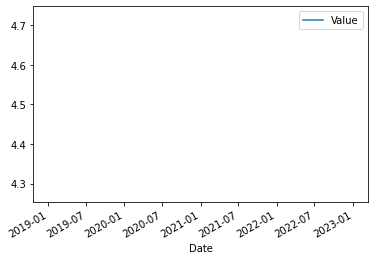

In [18]:
estc_df.plot()

In [64]:
tyr_df = tyr_df.rename(columns={"Value":"10_yr"})

In [4]:
eff_df = quandl.get("FRED/DFF", start_date="2020-01-01", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"FF"})
fyr_df = quandl.get("FRED/DGS5", start_date="2020-01-01", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"5_yr"})
tyr_df = quandl.get("FRED/DGS30", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"10_yr"})
m1_df = quandl.get("FRED/M1", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"M2"})
cpi_df = quandl.get("FRED/CPILFESL", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"CPI"})
ur_df = quandl.get("FRED/UNRATE", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"UR"})
claims_df = quandl.get("FRED/IC4WSA", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"Claims"})
pce_df = quandl.get("FRED/PCE", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"PCE"})
psr_df = quandl.get("FRED/PSAVERT", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"PSR"})
dpi_df = quandl.get("FRED/DSPIC96", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"DPI"})




In [6]:
#calculate differences
m1_df = quandl.get("FRED/M1", start_date="2020-01-01", end_date="2021-08-29", api_key="znGR4tW3YiZBhmxBbnr1").rename(columns={"Value":"M2"}).reset_index()

In [10]:
m1_df.head()

,Date,M2
0,2020-01-06,3947.9
1,2020-01-13,3949.4
2,2020-01-20,3977.6
3,2020-01-27,3961.8
4,2020-02-03,4080.8


In [7]:
import seaborn as sns

In [18]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

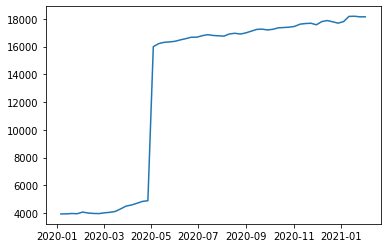

In [19]:
plt.plot(m1_df['Date'],m1_df['M2'])
plt.show()

In [20]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, default: `.mlab.detrend_none` (no detrending)
            A detrending function applied to *x*.  It must have the
            signature ::
        
                detrend(x: np.ndarray) -> np.ndarray
        
        normed : bool, default: True
            If `

In [28]:
m1_df['month'] = m1_df['Date'].apply(lambda x: pd.Timestamp.month_name(x))

In [31]:
import numpy as np

In [4]:
def p50(x):
    
   return np.percentile(x,50)

In [5]:
p50(m1_df['M2'])

NameError: name 'm1_df' is not defined

In [39]:
help(np.percentile)

Help on function percentile in module numpy:

percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th percentile of the data along the specified axis.
    
    Returns the q-th percentile(s) of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.
    
        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
     

In [43]:
m1_df_agg = m1_df.groupby('month').agg(avg_m2=('M2', np.mean), max_m2=('M2', np.mean), median_m2=('M2',p50)).reset_index()

In [66]:
m1_df_agg.iloc[:,1:]

,avg_m2,max_m2,median_m2
0,4763.1250,4763.1250,4782.40
1,16900.0600,16900.0600,16907.40
2,17785.6500,17785.6500,17791.40
3,6837.6200,6837.6200,4012.10
4,11016.3375,11016.3375,10887.15
5,16802.5750,16802.5750,16791.20
6,16556.7800,16556.7800,16571.70
7,4208.0600,4208.0600,4125.70
8,16212.2000,16212.2000,16260.10
9,17594.4200,17594.4200,17613.60


In [67]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins: bool = False, precision: int = 3, duplicates: str = 'raise')
    Quantile-based discretization function.
    
    Discretize variable into equal-sized buckets based on rank or based
    on sample quantiles. For example 1000 values for 10 quantiles would
    produce a Categorical object indicating quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : int or list-like of float
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
    labels : array or False, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins. If True, raises an error.
    retbins : bool, optional
        Whether to return the (bins, labels) or not. Can b

In [78]:
for x in m1_df_agg.columns[1:]:
    print(x)

avg_m2
max_m2
median_m2


In [94]:
m1_df_agg_pc = pd.DataFrame()
m1_df_agg_pc[x]=[pd.qcut(m1_df_agg[x],10) for x in m1_df_agg.columns[1:]]

In [109]:
# m1_df_agg_pc = m1_df_agg.iloc[:,0]
# m1_df_agg_pc = pd.DataFrame()
for x in m1_df_agg.columns[1:]:
    m1_df_agg[str(x+' pct')]= pd.qcut(m1_df_agg[x],10, labels=False)
# m1_df_agg_pc['Date'] = m1_df_agg['Date']

In [111]:
m1_df_agg.head()

,month,avg_m2,max_m2,median_m2,avg_m2 pct,max_m2 pct,median_m2 pct
0,April,4763.1250,4763.1250,4782.40,0,0,1
1,August,16900.0600,16900.0600,16907.40,6,6,6
2,December,17785.6500,17785.6500,17791.40,9,9,9
3,February,6837.6200,6837.6200,4012.10,1,1,0
4,January,11016.3375,11016.3375,10887.15,2,2,2


In [96]:
m1_df_agg.columns[1:]

Index(['avg_m2', 'max_m2', 'median_m2'], dtype='object')

In [93]:
m1_df_agg.iloc[:,0].head()

0       April
1      August
2    December
3    February
4     January
Name: month, dtype: object

In [88]:
ml_combined = m1_df_agg.merge(m1_df_agg_pc, on='Date')

KeyError: 'Date'

In [45]:
m1_df_agg.head()

,month,avg_m2,max_m2,median_m2
0,April,4763.1250,4763.1250,4782.40
1,August,16900.0600,16900.0600,16907.40
2,December,17785.6500,17785.6500,17791.40
3,February,6837.6200,6837.6200,4012.10
4,January,11016.3375,11016.3375,10887.15


In [59]:
ml_melted=m1_df_agg.melt(id_vars='month',value_vars=['avg_m2','max_m2','median_m2'])

In [60]:
ml_melted.head()

,month,variable,value
0,April,avg_m2,4763.1250
1,August,avg_m2,16900.0600
2,December,avg_m2,17785.6500
3,February,avg_m2,6837.6200
4,January,avg_m2,11016.3375


<AxesSubplot:xlabel='month'>

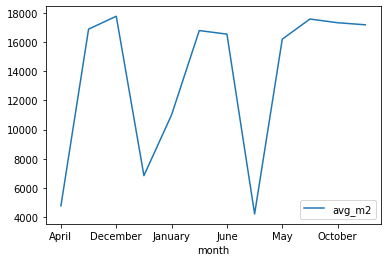

In [35]:
m1_df_agg.plot(x='month', y='avg_m2')

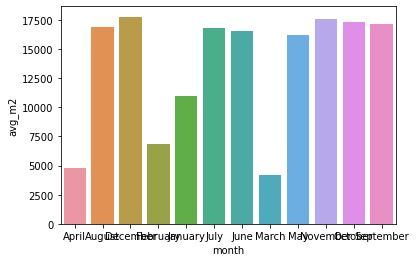

In [36]:
ax = sns.barplot(x='month', y='avg_m2', data=m1_df_agg)


plt.show()

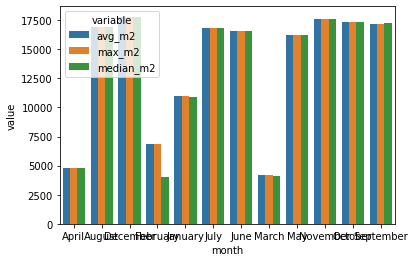

In [63]:
ax = sns.barplot(x='month', y='value',hue='variable', data=ml_melted)

plt.show()

In [8]:
import pandas as pd

In [9]:
help(pd)

Help on function timedelta_range in module pandas.core.indexes.timedeltas:

timedelta_range(start=None, end=None, periods=None, freq=None, name=None, closed=None) -> pandas.core.indexes.timedeltas.TimedeltaIndex
    Return a fixed frequency TimedeltaIndex, with day as the default
    frequency.
    
    Parameters
    ----------
    start : str or timedelta-like, default None
        Left bound for generating timedeltas.
    end : str or timedelta-like, default None
        Right bound for generating timedeltas.
    periods : int, default None
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'.
    name : str, default None
        Name of the resulting TimedeltaIndex.
    closed : str, default None
        Make the interval closed with respect to the given frequency to
        the 'left', 'right', or both sides (None).
    
    Returns
    -------
    rng : TimedeltaIndex
    
    Notes
    -----
    

In [ ]:
ml_df.

In [ ]:
ml_df.groupby('Date').agg()

In [67]:
df_all = fyr_df.merge(tyr_df, on='Date', how='left')\
.merge(m2_df, on='Date', how='left')\
.merge(cpi_df, on='Date', how='left')\
.merge(ur_df, on='Date', how='left')\
.merge(claims_df, on='Date', how='left')\
.merge(pce_df, on='Date', how='left')\
.merge(psr_df, on='Date', how='left')\
.merge(dpi_df, on='Date', how='left')

In [ ]:

df.to_sql('df', conn, if_exists='replace')

statements = ['drop table if exists df_buckets',
'create table df_buckets as \
Select t1.*, \
ntile(10) over (order by services_added ASC) as services_decile, \
ntile(10) over (order by client_bookings ASC) as bookings_decile, \
ntile(10) over (order by clients_booked ASC) as clients_decile \
from \
df as t1 \
',]


for statement in statements:
    conn.execute(statement)

df_buckets = pd.read_sql('select * from df_buckets', conn)   

In [68]:
df_all

,5_yr,10_yr_x,10_yr_y,M2,CPI,UR,PCE,PSR,DPI
Date,,,,,,,,,
2020-01-02,1.67,2.33,2.33,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.59,2.26,2.26,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.61,2.28,2.28,15350.8,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.62,2.31,2.31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.67,2.35,2.35,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-20,0.80,1.87,1.87,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-23,0.78,1.87,1.87,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,0.80,1.91,1.91,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

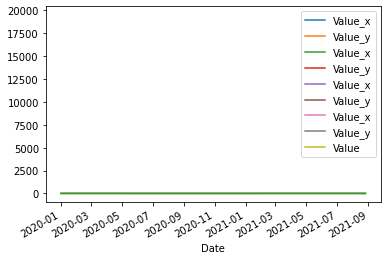

In [55]:
df_all.plot()

In [59]:
fyr_df.describe()

,Value
count,416.000000
mean,0.615409
std,0.352523
min,0.190000
25%,0.340000
50%,0.460000
75%,0.812500
max,1.670000


In [56]:
bonds = fyr_df.merge(tyr_df, on='Date', how='left')

In [58]:
bonds.describe()

,Value_x,Value_y
count,416.000000,416.000000
mean,0.615409,1.777909
std,0.352523,0.373830
min,0.190000,0.990000
25%,0.340000,1.430000
50%,0.460000,1.700000
75%,0.812500,2.110000
max,1.670000,2.450000


<AxesSubplot:xlabel='Date'>

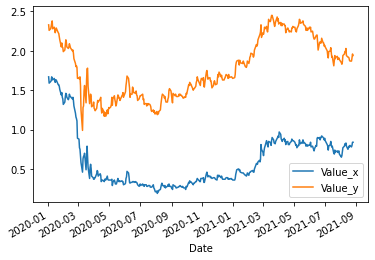

In [57]:
bonds.plot()

In [72]:
df_all.head()

,5_yr,10_yr_x,10_yr_y,M2,CPI,UR,PCE,PSR,DPI
Date,,,,,,,,,
2020-01-02,1.67,2.33,2.33,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.59,2.26,2.26,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.61,2.28,2.28,15350.8,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.62,2.31,2.31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.67,2.35,2.35,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
import numpy as np

In [87]:
df_gb = df_all.groupby(['Date']).agg(sum_5yr=('5_yr', np.sum)).reset_index()

In [90]:
df_gb.head()

,Date,sum_5yr
0,2020-01-02,1.67
1,2020-01-03,1.59
2,2020-01-06,1.61
3,2020-01-07,1.62
4,2020-01-08,1.67


In [91]:
df_gb.pivot(index='sum_5yr', columns='Date', values='sum_5yr')

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2021-08-13,2021-08-16,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26
sum_5yr,,,,,,,,,,,,,,,,,,,,,
0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.61,NaN,NaN,1.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.62,NaN,NaN,NaN,1.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.63,NaN,NaN,NaN,NaN,NaN,NaN,1.63,NaN,1.63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
import matplotlib as mpl

In [94]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='Date'>

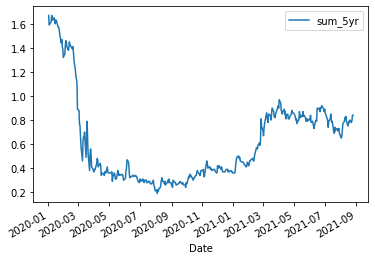

In [97]:
df_gb.plot(x='Date', y='sum_5yr', kind='line')

In [98]:
help(df_gb.stack)

Help on method stack in module pandas.core.frame:

stack(level=-1, dropna=True) method of pandas.core.frame.DataFrame instance
    Stack the prescribed level(s) from columns to index.
    
    Return a reshaped DataFrame or Series having a multi-level
    index with one or more new inner-most levels compared to the current
    DataFrame. The new inner-most levels are created by pivoting the
    columns of the current dataframe:
    
      - if the columns have a single level, the output is a Series;
      - if the columns have multiple levels, the new index
        level(s) is (are) taken from the prescribed level(s) and
        the output is a DataFrame.
    
    Parameters
    ----------
    level : int, str, list, default -1
        Level(s) to stack from the column axis onto the index
        axis, defined as one index or label, or a list of indices
        or labels.
    dropna : bool, default True
        Whether to drop rows in the resulting Frame/Series with
        missing val

In [ ]:
df['sum_5yr'].

In [ ]:
def perc(x):
    

In [109]:
df_gb['p_qt'] = df_gb['sum_5yr'].apply(lambda x: pd.qcut(x))

TypeError: qcut() missing 1 required positional argument: 'q'

In [113]:
df_gb['p_qt'] = [pd.qcut[df_gb['sum_5yr'][x]] for x in df_gb['sum_5yr']]

KeyError: 1.67

In [106]:
df_gb['p_bucket_1'] = df_gb['sum_5yr'].apply(lambda x: np.where(x>0.8,1,0))

In [99]:
df_gb['p_bucket_2'] = [np.where(x>0.8,1,0) for x in df_gb['sum_5yr']]

In [ ]:
df_gb.so

In [105]:
df_gb.sort_values('sum_5yr', ascending=True).head()

,Date,sum_5yr,p_bucket
148,2020-08-04,0.19,0
150,2020-08-06,0.21,0
146,2020-07-31,0.21,0
147,2020-08-03,0.22,0
149,2020-08-05,0.22,0


In [85]:
help(df_gb.pivot(index='5_yr', columns='Date'))

Help on method pivot in module pandas.core.frame:

pivot(index=None, columns=None, values=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    
        .. versionchanged:: 1.1.0
           Also accept list of index names.
    
    columns : str or object or a list of str
        Column to use to make new frame's columns.
    
        .. versionchanged:: 1.1.0
           Also acc

In [79]:
help(df_all.groupby('Date').agg)

Help on method aggregate in module pandas.core.groupby.generic:

aggregate(func=None, *args, engine=None, engine_kwargs=None, **kwargs) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Aggregate using one or more operations over the specified axis.
    
    Parameters
    ----------
    func : function, str, list or dict
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
    
        Can also accept a Numba JIT function with
        ``engine='numba'`` specified. Only passing a single function is supported
        with this engine.
    
        If the ``'numba'`` engine is chosen, the function must be
        a user defined func

In [22]:
df_all = quandl.bulkdownload("WIKI")

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.